Hough Line Transform

In [69]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [70]:
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,300)


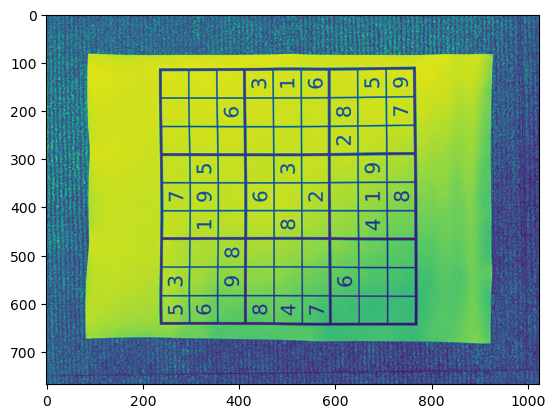

In [71]:
plt.imshow(gray)

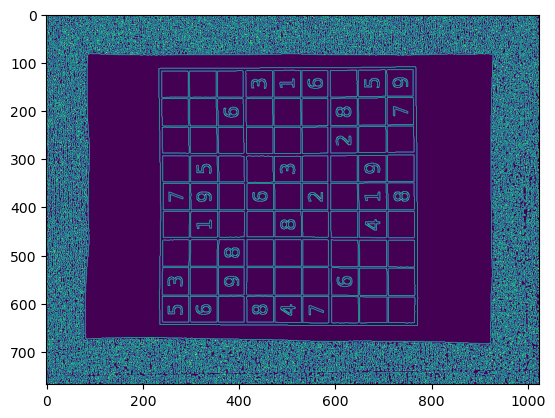

In [72]:
plt.imshow(edges)

In [73]:
lines.shape

(566, 1, 2)

In [74]:
for i in range(300):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imwrite('sIMG_2164_1.jpg',img)

True

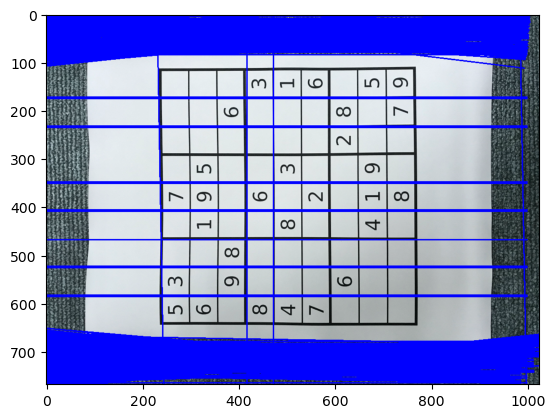

In [75]:
plt.imshow(img)

In [76]:
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)




In [77]:
for i in range(300):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imwrite('sIMG_2164_2.jpg',img)

True

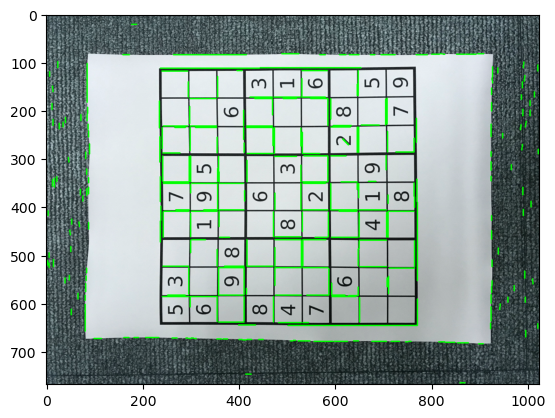

In [78]:
plt.imshow(img)

In [79]:
def nothing(x):
    return

In [80]:
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)




In [ ]:
# Create a black image, a window
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('minLineLength','image',0,500,nothing)
cv2.createTrackbar('maxLineGap','image',0,500,nothing)
cv2.createTrackbar('lineNums','image',0,100,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    minLineLength = cv2.getTrackbarPos('minLineLength','image')
    maxLineGap = cv2.getTrackbarPos('maxLineGap','image')
    lineNums = cv2.getTrackbarPos('lineNums','image')
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    for i in range(lineNums):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    
cv2.destroyAllWindows()